In [9]:
import numpy as np
import matplotlib.pyplot as plt

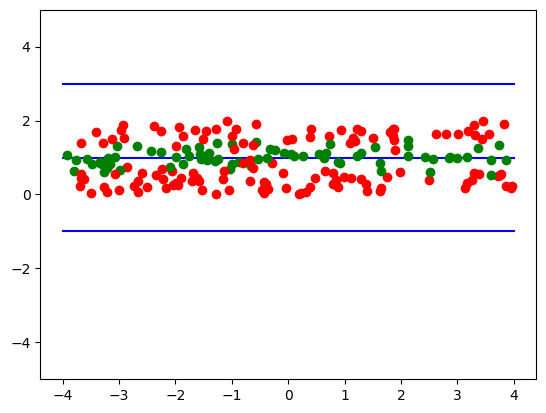

In [12]:
a=2;l=1
fig,ax=plt.subplots()
ax.plot([-4,4],[-a/2]*2,"b")
ax.plot([-4,4],[a/2]*2,"b")
ax.plot([-4,4],[3*a/2]*2,"b")
ax.set_ylim([-5,5])
n=200
y=np.random.random(size=(n))*a
theta=np.random.random(size=(n))*(np.pi)
ys=y+l/2*np.sin(theta)
yx=y-l/2*np.sin(theta)

x=np.random.uniform(low=-4,high=4,size=(n))
def flag(y,ys,yx):
    return (y>a/2 and yx<a/2) or (y<a/2 and ys>a/2)
flag=np.vectorize(flag)
f=flag(y,ys,yx)
def color(flag):
    if flag:
        return "green"
    return "red"

for i in range(n):
    ax.plot(x[i],y[i],"o",color=color(f[i]))


In [36]:
result=n/np.sum(flag(y,ys,yx))
err=10*abs(np.log(abs(np.pi-result)/np.pi))/np.log(10)
print("err=%.3fdB"%err)

err=24.475dB


In [90]:
f[5]

False

MovieWriter ffmpeg unavailable; using Pillow instead.


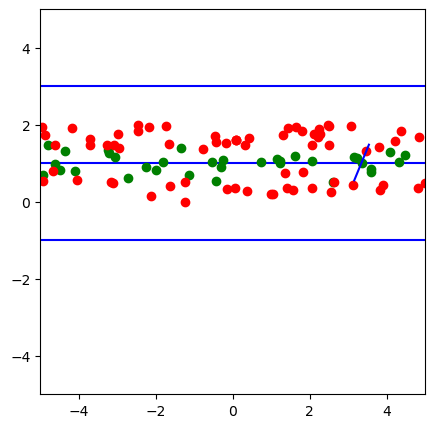

In [123]:
xz=x-l/2*np.cos(theta)
xy=x+l/2*np.cos(theta)
from matplotlib.animation import FuncAnimation
fig1=plt.figure(figsize=(5,5))
plt.plot([-5,5],[-a/2]*2,"b")
plt.plot([-5,5],[a/2]*2,"b")
plt.plot([-5,5],[3*a/2]*2,"b")
line1,=plt.plot([],[],"o",color="green")
line2,=plt.plot([],[],"o",color="red")
line3,=plt.plot([],[],"b-")
plt.xlim(-5,5)
plt.ylim(-5,5)
ax = plt.gca()
ax.set_aspect(1)
x1=[]
x2=[]
y1=[]
y2=[]
def update_line(num):
    line3.set_data([xz[num],xy[num]],[yx[num],ys[num]])
    if f[num]:
        x1.append(x[num])
        y1.append(y[num])
        line1.set_data(x1[0:num],y1[0:num])
    else:
        x2.append(x[num])
        y2.append(y[num])
        line2.set_data(x2[0:num],y2[0:num])
    return line1,line2,line3
ani=FuncAnimation(fig1, update_line, np.arange(n),interval=500,blit=True)
ani.save("u.gif")